## Murad Aladdinzade

## Semantic Similarity

## Introduction

In this study, I investigate the changes in how similar scientific articles are to each other over time, focusing on two distinct areas: traditional scientific fields, represented by Mathematics, and modern scientific fields, represented by Computer Science. This analysis centers on article abstracts from the arXiv platform, a comprehensive repository of scientific papers.



**Research Question**:  How has the yearly average similarity of scientific articles changed over time within traditional and modern scientific fields, particularly in CS and Math?

**Hypothesis**: I assume that due to the rapid advancements in modern technological fields like Computer Science, these areas have experienced more growth and diversification than traditional fields such as Mathematics. This suggests that, the similarity of abstracts of articles in Mathematics haven't changed much over time, whereas the similarity of abstracts of articles in Computer Science have decreased overtime due to increase in diversification of technologies.Furthermore, it is clear that the number of papers in CS field has substantially grown in the last decades as indicated by arXiv website(Figure 1).

**Alternative Viewpoint**:
One could also argue that, since the number of subcategories in CS is more than in Math (please see the figure below, which is produced in this notebook), it might suggest that the abstracts of papers are becoming less similar, since they are split into more subcategories than those in Math. Considering this, we need to factor out the effects caused by the number of subcategories in each scientific field and conduct additional statistical analysis to test our hypothesis.

![Image](https://drive.google.com/uc?export=view&id=1SJTn9ydDWfjyxEnBwcKsFZmckZQvxWhC)

[Figure 1 - Monthly Submissions of ArXiv papers](https://info.arxiv.org/help/stats/2021_by_area/index.html)


![Image](https://drive.google.com/uc?export=view&id=1Nx6Wkvw0hXJmd4_yZbHvg36t-basS0GL)
Figure 2 - Unique Subcategories by Year and Scientific Field


## Method

### Data
The dataset for this research consists of over 53,000 abstracts from scientific papers published on arXiv, spanning a diverse array of disciplines over the past three decades.

For additional details on the dataset and to access the source of these abstracts, please visit the
[Kaggle website](https://www.kaggle.com/datasets/arplusman/papers-by-subject).

Possible categories (Selected only Math and CS), each of them has subcategoires as well:

**Categories are indicated in the Category Section of each paper in Arxiv**

* Computer Science
* Mathematics
* Economics
* Electrical Engineering and System Science
* Physics
* Quantitative Biology
* Quantitative Finance
* Statistics

### Linguistic Analysis

For the analysis of the abstracts in this study, the spaCy natural language processing package was utilized to identify semantic similarity in abstracts of CS and Math papers overtime.  Specifically, I calculated vector centroids of papers in each scientific field for each year, and calculated semantic similarity between each article for its respective centroid, and calculated the standard deviation for each year and each scientific field.

### Statistical Analysis

* Simple Linear Regression were employed for both CS and Math papers




# NLP Analysis

The steps for the NLP analysis in this project are outlined as follows:

* Retrieve abstracts using Colab and Pandas.
* Identify semantic similarity in abstracts of CS and Math papers overtime

## Statistical Analysis



In [ ]:
# Load the Drive
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the libraries
import os
import pandas as pd

# change directory to NLP folder
os.chdir("/content/drive/MyDrive/NLP")

# what is in NLP folder
os.listdir()

['reading_600_texts.csv',
 'writing_data_w_meta_data.csv',
 'arXiv-DataFrame.csv',
 'arxiv num papers.PNG',
 'Preprocessed_abstracts.csv',
 'CRAPII_100.csv',
 'balanced_data_cs_math.csv',
 'only_cs_math.csv',
 'balanced_data_subcategories.csv',
 'arxiv_submissions.PNG',
 'cs_math_categories.PNG']

In [ ]:
#read in the arXiv-DataFrame.csv file
reading_data = pd.read_csv('arXiv-DataFrame.csv')


In [ ]:
# printing first 5 rows of data
reading_data.head(5)

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI']
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']


In [ ]:
reading_data['Primary Category'].value_counts()

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

## Data Cleaning

In [ ]:
# printing column names of data
reading_data.columns


Index(['Unnamed: 0', 'id', 'Title', 'Summary', 'Author', 'Link',
       'Publish Date', 'Update Date', 'Primary Category', 'Category'],
      dtype='object')

In [ ]:
# summary column is actually abstracts of articles
# let's change the column name from Summary to Abstract
reading_data.rename(columns={'Summary':'Abstract'}, inplace=True)

# let's remove Unnamed:0 column, which is just a row id
del reading_data['Unnamed: 0']

In [ ]:
#let's lower case the abstract column
reading_data['Abstract'] = reading_data['Abstract'].str.lower()

In [ ]:
# I will use Publish Date column to get the year of publishing and assign it to Publish Year column, let's ignore the update date
reading_data['Publish Year'] = pd.to_datetime(reading_data['Publish Date']).dt.year

In [ ]:
#let's inspect the columns
# there is no null values
reading_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53474 entries, 0 to 53473
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                53474 non-null  object
 1   Title             53474 non-null  object
 2   Abstract          53474 non-null  object
 3   Author            53474 non-null  object
 4   Link              53474 non-null  object
 5   Publish Date      53474 non-null  object
 6   Update Date       53474 non-null  object
 7   Primary Category  53474 non-null  object
 8   Category          53474 non-null  object
 9   Publish Year      53474 non-null  int32 
dtypes: int32(1), object(9)
memory usage: 3.9+ MB


In [ ]:
# Splitting the 'Primary Category' at the first dot and taking the first part (before the dot)
reading_data['Category_New'] = reading_data['Primary Category'].str.split('.').str[0]

In [ ]:
# filter for math  and cs
reading_data = reading_data[reading_data['Category_New'].isin(['cs', 'math'])].reset_index(drop=True)

In [ ]:
# let's see number of articles by year
reading_data[['Publish Year', 'Category_New']].value_counts().sort_index()

Publish Year  Category_New
1989          math             2
1990          cs               2
              math            16
1991          cs               3
              math            44
                              ..
2021          cs              63
              math             1
2022          cs              58
2023          cs              38
              math             1
Name: count, Length: 64, dtype: int64

In [ ]:
# let's save the data to analyze the alternative viewpoint at the end
reading_data.to_csv('only_cs_math.csv', index=False)

In [ ]:
# First, filter the dataset to include only those groups (Category_New and Publish Year) with at least 150 articles
filtered_data = reading_data.groupby(['Category_New', 'Publish Year']).filter(lambda x: len(x) >= 150)

#let's sample 150 articles for each year and category
def sample_rows(group):
    return group.sample(n=min(150, len(group)), random_state=1)  # Keeping the random state for reproducibility

# Now, group by 'Category_New' and 'Publish Year' and apply the sampling function
balanced_data = filtered_data.groupby(['Category_New', 'Publish Year'], group_keys=False).apply(sample_rows)



In [ ]:
# now, we should filter the data set from 1998 to 2011, in order to have both cs and math in each year
balanced_data[['Publish Year', 'Category_New']].value_counts().sort_index()

Publish Year  Category_New
1992          math            150
1993          math            150
1994          math            150
1995          math            150
1996          math            150
1997          math            150
1998          cs              150
              math            150
1999          cs              150
              math            150
2000          cs              150
              math            150
2001          cs              150
              math            150
2002          cs              150
              math            150
2003          cs              150
              math            150
2004          cs              150
              math            150
2005          cs              150
              math            150
2006          cs              150
              math            150
2007          cs              150
              math            150
2008          cs              150
              math            150
2009          cs     

In [ ]:
# now, we should filter the data set from 1998 to 2011, in order to have both cs and math in each year
balanced_data= balanced_data[(balanced_data['Publish Year'] >= 1998) & (balanced_data['Publish Year'] <= 2011)]


In [ ]:
# now, filtering is completed
balanced_data[['Publish Year', 'Category_New']].value_counts().sort_index()

Publish Year  Category_New
1998          cs              150
              math            150
1999          cs              150
              math            150
2000          cs              150
              math            150
2001          cs              150
              math            150
2002          cs              150
              math            150
2003          cs              150
              math            150
2004          cs              150
              math            150
2005          cs              150
              math            150
2006          cs              150
              math            150
2007          cs              150
              math            150
2008          cs              150
              math            150
2009          cs              150
              math            150
2010          cs              150
              math            150
2011          cs              150
              math            150
Name: count, dtype: i

In [ ]:
# saving data for reproducibility
# it might be the case that the same data is not selected, so I am saving it and reading it afterwards
# also, I am commenting it out to prevent overwriting everytime

#balanced_data.to_csv('balanced_data_cs_math.csv', index=False)

balanced_data= pd.read_csv('balanced_data_cs_math.csv')

In [ ]:
# separating the data into cs and math
cs= balanced_data[balanced_data['Category_New'] =='cs'].reset_index(drop=True)

math= balanced_data[balanced_data['Category_New'] == 'math'].reset_index(drop=True)

In [ ]:
import spacy
import spacy.cli #spacy command line interface

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg") #have a call for the spacy model


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# removing stop words and punct.
#define a function first
def stopwords_remove(text): #function
    doc = nlp(text, disable=["parser", "ner"]) #spacy the text
    text_no_stopwords = [token.text for token in doc if not token.is_stop and not token.is_punct] #get list of words that are not stopwords or punctuation
    return ' '.join(text_no_stopwords) #return a string


In [ ]:
# Apply the remove_stopwords_spacy function to the 'Abstract' column
cs['cw_text'] = cs['Abstract'].apply(stopwords_remove)
math['cw_text'] = math['Abstract'].apply(stopwords_remove)



In [ ]:
import numpy as np
#compute vector embeddings
docs = [doc for doc in nlp.pipe(cs['cw_text'])]
cs['vectors'] = [doc.vector for doc in docs]
# Compute centroids for each year
centroids = cs.groupby('Publish Year')['vectors'].apply(lambda x: np.mean(np.vstack(x), axis=0)).to_dict()
# Function to compute cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Initialize a column for similarity scores
cs['similarity_to_centroid'] = 0.0

# Compute similarity score of each article to its year's centroid
for index, row in cs.iterrows():
    year = row['Publish Year']
    vector = row['vectors']
    centroid = centroids[year]
    cs.at[index, 'similarity_to_centroid'] = cosine_similarity(vector, centroid)

In [ ]:
#compute vector embeddings
docs = [doc for doc in nlp.pipe(math['cw_text'])]
math['vectors'] = [doc.vector for doc in docs]
# Compute centroids for each year
centroids = math.groupby('Publish Year')['vectors'].apply(lambda x: np.mean(np.vstack(x), axis=0)).to_dict()

# Initialize a column for similarity scores
math['similarity_to_centroid'] = 0.0

# Compute similarity score of each article to its year's centroid
for index, row in math.iterrows():
    year = row['Publish Year']
    vector = row['vectors']
    centroid = centroids[year]
    math.at[index, 'similarity_to_centroid'] = cosine_similarity(vector, centroid)

### CS: Statistical Analysis

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                       OLS Regression Results                                      
Dep. Variable:     Standard Deviation of Similarity Scores   R-squared:                       0.416
Model:                                                 OLS   Adj. R-squared:                  0.368
Method:                                      Least Squares   F-statistic:                     8.556
Date:                                     Sun, 07 Apr 2024   Prob (F-statistic):             0.0127
Time:                                             21:13:00   Log-Likelihood:                 37.605
No. Observations:                                       14   AIC:                            -71.21
Df Residuals:                                           12   BIC:                            -69.93
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


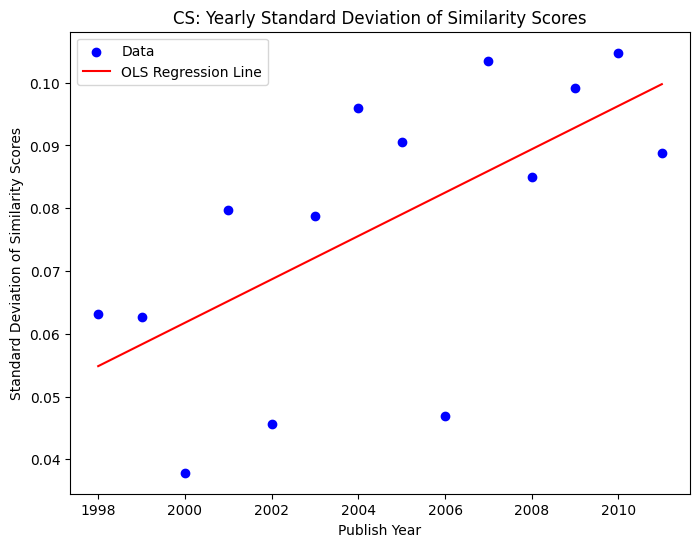

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 'Publish Year' and 'similarity_to_centroid' are columns in cs
# Calculate the standard deviation of similarity scores by year
std_by_year = cs.groupby('Publish Year')['similarity_to_centroid'].std().reset_index(name='Standard Deviation of Similarity Scores')

# Prepare the data for regression
X = sm.add_constant(std_by_year['Publish Year'])  # Adding a constant for the intercept
Y = std_by_year['Standard Deviation of Similarity Scores']

# Perform the linear regression
model = sm.OLS(Y, X).fit()

# Print the summary results
print(model.summary())

# Optional: Plot the standard deviation over years and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(std_by_year['Publish Year'], std_by_year['Standard Deviation of Similarity Scores'], color='blue', label='Data')
plt.plot(std_by_year['Publish Year'], model.predict(X), color='red', label='OLS Regression Line')

plt.title('CS: Yearly Standard Deviation of Similarity Scores')
plt.xlabel('Publish Year')
plt.ylabel('Standard Deviation of Similarity Scores')
plt.legend()
plt.show()


### Results for CS and Discussion

In our regression analysis, the coefficient for 'Publish Year' is observed to be positive (β = 0.0035, p = 0.013), indicating a statistically significant increase in the standard deviation of similarity scores over time. This increment suggests a growing diversity within the Computer Science abstracts across the years under study.

The increase in standard deviation across the years suggests that the diversity of topics and content in Computer Science abstracts has expanded. Consequently, based on the statistical significance of our findings,this analysis supports our hypothesis.

### Math: Statistical Analysis

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                       OLS Regression Results                                      
Dep. Variable:     Standard Deviation of Similarity Scores   R-squared:                       0.001
Model:                                                 OLS   Adj. R-squared:                 -0.083
Method:                                      Least Squares   F-statistic:                  0.006673
Date:                                     Sun, 07 Apr 2024   Prob (F-statistic):              0.936
Time:                                             21:13:54   Log-Likelihood:                 41.513
No. Observations:                                       14   AIC:                            -79.03
Df Residuals:                                           12   BIC:                            -77.75
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


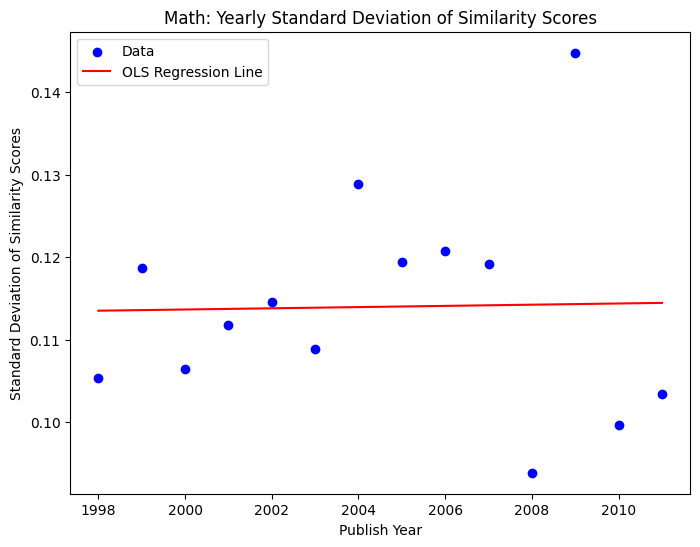

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 'Publish Year' and 'similarity_to_centroid' are columns in cs
# Calculate the standard deviation of similarity scores by year
std_by_year = math.groupby('Publish Year')['similarity_to_centroid'].std().reset_index(name='Standard Deviation of Similarity Scores')

# Prepare the data for regression
X = sm.add_constant(std_by_year['Publish Year'])  # Adding a constant for the intercept
Y = std_by_year['Standard Deviation of Similarity Scores']

# Perform the linear regression
model = sm.OLS(Y, X).fit()

# Print the summary results
print(model.summary())

# Optional: Plot the standard deviation over years and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(std_by_year['Publish Year'], std_by_year['Standard Deviation of Similarity Scores'], color='blue', label='Data')
plt.plot(std_by_year['Publish Year'], model.predict(X), color='red', label='OLS Regression Line')

plt.title('Math: Yearly Standard Deviation of Similarity Scores')
plt.xlabel('Publish Year')
plt.ylabel('Standard Deviation of Similarity Scores')
plt.legend()
plt.show()


## Results for Math and Discussion

Given the regression analysis for Mathematics, where the coefficient for 'Publish Year' is insignificant (β = 7.297e-05, p = 0.936), it appears that the year does not have a statistically significant effect on the standard deviation of similarity scores in Mathematics abstracts.


These results support our hypothesis that the similarity of abstracts in the field of Mathematics has remained relatively stable over time. This outcome supports the hypothesis that traditional scientific fields like Mathematics have not seen the same rate of diversification as fields like Computer Science, reinforcing the idea that advancements and changes in technology drive a greater breadth of exploration and discussion within their academic literature.

## Alternative Viewpoint

In [ ]:
# read the full cs and math data again
only_cs_math= pd.read_csv('only_cs_math.csv')

In [ ]:
# Splitting the 'Primary Category' at the first dot and taking the second part for subcategory
only_cs_math['Subcategory'] = only_cs_math['Primary Category'].str.split('.').str[1]

In [ ]:
only_cs_math.head(5)

,id,Title,Abstract,Author,Link,Publish Date,Update Date,Primary Category,Category,Publish Year,Category_New,Subcategory
0,cs/9308101v1,Dynamic Backtracking,because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI'],1993,cs,AI
1,cs/9308102v1,A Market-Oriented Programming Environment and ...,market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI'],1993,cs,AI
2,cs/9309101v1,An Empirical Analysis of Search in GSAT,we describe an extensive study of search in gs...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI'],1993,cs,AI
3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,as real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI'],1993,cs,AI
4,cs/9311102v1,Software Agents: Completing Patterns and Const...,to support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI'],1993,cs,AI


In [ ]:
# since we filtered the data set from 1998 to 2011, in order to have both cs and math in each year previously, let's do the same
only_cs_math= only_cs_math[(only_cs_math['Publish Year'] >= 1998) & (only_cs_math['Publish Year'] <= 2011)]


In [ ]:
# Group by 'Publish Year' and 'Category_New', then count unique 'Subcategory' values for each group
unique_primary_categories = only_cs_math.groupby(['Publish Year', 'Category_New'])['Subcategory'].nunique()
# sort the results by index (i.e., by 'Publish Year' and 'Category_New')
sorted_unique_primary_categories = unique_primary_categories.sort_index()

# Display the results
print(sorted_unique_primary_categories)

Publish Year  Category_New
1998          cs              21
              math            27
1999          cs              25
              math            28
2000          cs              25
              math            26
2001          cs              29
              math            23
2002          cs              32
              math            23
2003          cs              32
              math            22
2004          cs              34
              math            19
2005          cs              34
              math            14
2006          cs              35
              math            12
2007          cs              34
              math             9
2008          cs              34
              math             8
2009          cs              34
              math             7
2010          cs              33
              math             6
2011          cs              31
              math             5
Name: Subcategory, dtype: int64


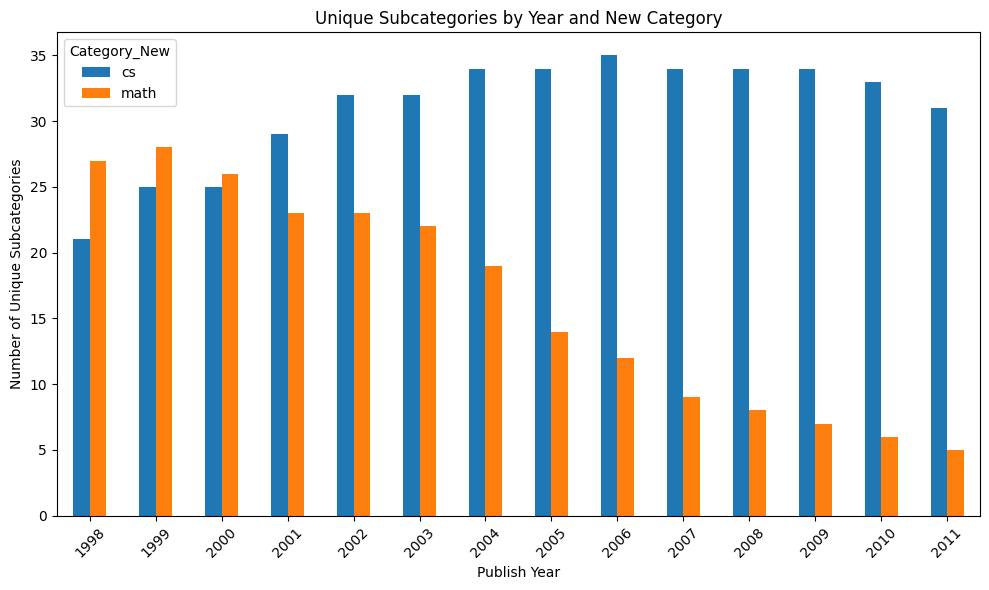

In [ ]:
#let's visualize the number of subcategories
import matplotlib.pyplot as plt


# Unstack the multi-index Series to create a DataFrame suitable for plotting.
# This transforms the 'Category_New' level of the index into column headers, making it easy to plot.
df_for_plotting = sorted_unique_primary_categories.unstack()

# Plotting
df_for_plotting.plot(kind='bar', figsize=(10, 6))
plt.title('Unique Subcategories by Year and New Category')
plt.xlabel('Publish Year')
plt.ylabel('Number of Unique Subcategories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category_New')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.

plt.show()

In [ ]:
# since the minimum number of categories happens for math in 2011, which is 5, let's choose top 5 categories for each year and each category, and see the number of articles for each group
# Group by 'Publish Year' and 'Category_New', then count rows for each 'Subcategory'


# Step 1: Determine the top 5 subcategories
# Group by 'Publish Year', 'Category_New', and 'Subcategory' and count rows
subcat_counts = only_cs_math.groupby(['Publish Year', 'Category_New', 'Subcategory']).size().reset_index(name='Counts')

# Sort and rank the counts within each group
subcat_counts['Rank'] = subcat_counts.groupby(['Publish Year', 'Category_New'])['Counts'].rank(method='first', ascending=False)

# Filter to keep only the top 5 subcategories in each group
top_subcategories = subcat_counts[subcat_counts['Rank'] <= 5]

# Step 2: Filter the original DataFrame
# We need to filter 'only_cs_math' to keep only the rows that match the top subcategories
filtered_df = pd.merge(only_cs_math, top_subcategories[['Publish Year', 'Category_New', 'Subcategory']],
                       on=['Publish Year', 'Category_New', 'Subcategory'])





In [ ]:

# now, we have top 5 subcategories with most articles for each year and category_new
filtered_df[['Publish Year', 'Category_New', 'Subcategory']].value_counts().sort_index().head(15)


Publish Year  Category_New  Subcategory
1998          cs            AI              13
                            CC               7
                            CL              22
                            NI              60
                            SE               8
              math          AG             261
                            CO              91
                            DG             118
                            GT             112
                            QA             186
1999          cs            CC              21
                            CG              16
                            CL              40
                            DL              12
                            NI               9
Name: count, dtype: int64

In [ ]:
# now, the least number of articles happens to be 98, which is 1999 cs.
filtered_df[['Publish Year', 'Category_New']].value_counts().sort_index()

Publish Year  Category_New
1998          cs              110
              math            768
1999          cs               98
              math            493
2000          cs              169
              math            361
2001          cs              191
              math            279
2002          cs              137
              math            383
2003          cs              196
              math            505
2004          cs              226
              math            445
2005          cs              663
              math            722
2006          cs              375
              math            318
2007          cs              464
              math            315
2008          cs              456
              math            160
2009          cs              330
              math            193
2010          cs              478
              math            202
2011          cs              401
              math            257
Name: count, dtype: i

In [ ]:

#let's sample 98 articles for each year and category
def sample_rows(group):
    return group.sample(n=min(98, len(group)))

# Now, group by 'Category_New' and 'Publish Year' and apply the sampling function
balanced_data_subcategories = filtered_df.groupby(['Category_New', 'Publish Year'], group_keys=False).apply(sample_rows)
# now we have 98 articles
balanced_data_subcategories[['Publish Year', 'Category_New']].value_counts().sort_index()



Publish Year  Category_New
1998          cs              98
              math            98
1999          cs              98
              math            98
2000          cs              98
              math            98
2001          cs              98
              math            98
2002          cs              98
              math            98
2003          cs              98
              math            98
2004          cs              98
              math            98
2005          cs              98
              math            98
2006          cs              98
              math            98
2007          cs              98
              math            98
2008          cs              98
              math            98
2009          cs              98
              math            98
2010          cs              98
              math            98
2011          cs              98
              math            98
Name: count, dtype: int64

In [ ]:
# saving data for reproducibility
# it might be the case that the same data is not selected, so I am saving it and reading it afterwards
# also, I am commenting it out to prevent overwriting everytime

#balanced_data_subcategories.to_csv('balanced_data_subcategories.csv', index=False)

balanced_data_subcategories= pd.read_csv('balanced_data_subcategories.csv')


In [ ]:
# let's split the df to cs and math
cs_sub = balanced_data_subcategories[balanced_data_subcategories['Category_New'] =='cs'].copy()
math_sub = balanced_data_subcategories[balanced_data_subcategories['Category_New'] =='math'].copy()


In [ ]:
# Apply the remove_stopwords_spacy function to the 'Abstract' column
cs_sub['cw_text'] = cs_sub['Abstract'].apply(stopwords_remove)
math_sub['cw_text'] = math_sub['Abstract'].apply(stopwords_remove)



In [ ]:
# repeat the process for cs_sub
import numpy as np
# compute vector embeddings
docs = [doc for doc in nlp.pipe(cs_sub['cw_text'])]
cs_sub['vectors'] = [doc.vector for doc in docs]
# Compute centroids for each year
centroids = cs_sub.groupby('Publish Year')['vectors'].apply(lambda x: np.mean(np.vstack(x), axis=0)).to_dict()
# Function to compute cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Initialize a column for similarity scores
cs_sub['similarity_to_centroid'] = 0.0

# Compute similarity score of each article to its year's centroid
for index, row in cs_sub.iterrows():
    year = row['Publish Year']
    vector = row['vectors']
    centroid = centroids[year]
    cs_sub.at[index, 'similarity_to_centroid'] = cosine_similarity(vector, centroid)

In [ ]:
# repeat the process for math_sub
import numpy as np
# compute vector embeddings
docs = [doc for doc in nlp.pipe(math_sub['cw_text'])]
math_sub['vectors'] = [doc.vector for doc in docs]
# Compute centroids for each year
centroids = math_sub.groupby('Publish Year')['vectors'].apply(lambda x: np.mean(np.vstack(x), axis=0)).to_dict()
# Function to compute cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Initialize a column for similarity scores
math_sub['similarity_to_centroid'] = 0.0

# Compute similarity score of each article to its year's centroid
for index, row in math_sub.iterrows():
    year = row['Publish Year']
    vector = row['vectors']
    centroid = centroids[year]
    math_sub.at[index, 'similarity_to_centroid'] = cosine_similarity(vector, centroid)

## CS: Statistical Analysis

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                       OLS Regression Results                                      
Dep. Variable:     Standard Deviation of Similarity Scores   R-squared:                       0.356
Model:                                                 OLS   Adj. R-squared:                  0.302
Method:                                      Least Squares   F-statistic:                     6.636
Date:                                     Sun, 07 Apr 2024   Prob (F-statistic):             0.0243
Time:                                             21:30:14   Log-Likelihood:                 32.290
No. Observations:                                       14   AIC:                            -60.58
Df Residuals:                                           12   BIC:                            -59.30
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


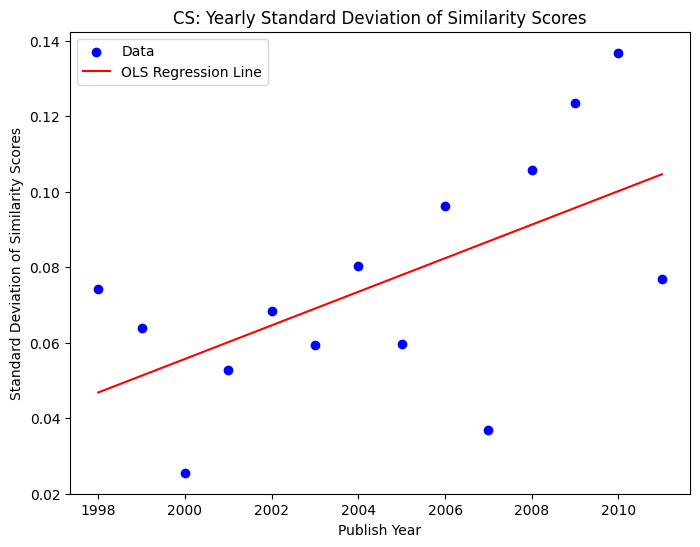

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'Publish Year' and 'similarity_to_centroid' are columns in cs
# Calculate the standard deviation of similarity scores by year
std_by_year = cs_sub.groupby('Publish Year')['similarity_to_centroid'].std().reset_index(name='Standard Deviation of Similarity Scores')

# Prepare the data for regression
X = sm.add_constant(std_by_year['Publish Year'])  # Adding a constant for the intercept
Y = std_by_year['Standard Deviation of Similarity Scores']

# Perform the linear regression
model = sm.OLS(Y, X).fit()

# Print the summary results
print(model.summary())

# Optional: Plot the standard deviation over years and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(std_by_year['Publish Year'], std_by_year['Standard Deviation of Similarity Scores'], color='blue', label='Data')
plt.plot(std_by_year['Publish Year'], model.predict(X), color='red', label='OLS Regression Line')

plt.title('CS: Yearly Standard Deviation of Similarity Scores')
plt.xlabel('Publish Year')
plt.ylabel('Standard Deviation of Similarity Scores')
plt.legend()
plt.show()


### Results for CS and Discussion

In our regression analysis, the coefficient for 'Publish Year' is observed to be positive (p = 0.024), indicating a statistically significant increase in the standard deviation of similarity scores over time. This increment suggests a growing diversity within the Computer Science abstracts across the years under study.

The increase in standard deviation across the years suggests that the diversity of topics and content in Computer Science abstracts has expanded. Consequently, after factoring out the effects of the number of subcategories, based on the statistical significance of our findings,this analysis supports our hypothesis that abstracts of CS papers have become more dissimilar overtime.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                       OLS Regression Results                                      
Dep. Variable:     Standard Deviation of Similarity Scores   R-squared:                       0.025
Model:                                                 OLS   Adj. R-squared:                 -0.057
Method:                                      Least Squares   F-statistic:                    0.3033
Date:                                     Sun, 07 Apr 2024   Prob (F-statistic):              0.592
Time:                                             21:33:23   Log-Likelihood:                 39.702
No. Observations:                                       14   AIC:                            -75.40
Df Residuals:                                           12   BIC:                            -74.12
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


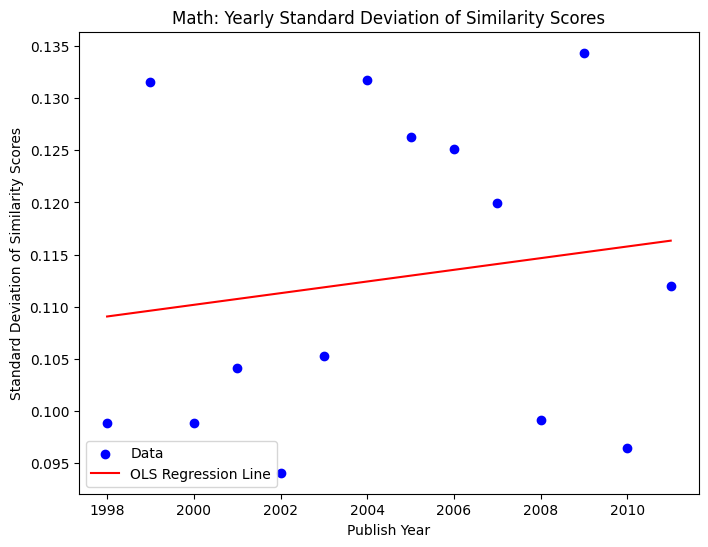

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'Publish Year' and 'similarity_to_centroid' are columns in cs
# Calculate the standard deviation of similarity scores by year
std_by_year = math_sub.groupby('Publish Year')['similarity_to_centroid'].std().reset_index(name='Standard Deviation of Similarity Scores')

# Prepare the data for regression
X = sm.add_constant(std_by_year['Publish Year'])  # Adding a constant for the intercept
Y = std_by_year['Standard Deviation of Similarity Scores']

# Perform the linear regression
model = sm.OLS(Y, X).fit()

# Print the summary results
print(model.summary())

# Optional: Plot the standard deviation over years and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(std_by_year['Publish Year'], std_by_year['Standard Deviation of Similarity Scores'], color='blue', label='Data')
plt.plot(std_by_year['Publish Year'], model.predict(X), color='red', label='OLS Regression Line')

plt.title('Math: Yearly Standard Deviation of Similarity Scores')
plt.xlabel('Publish Year')
plt.ylabel('Standard Deviation of Similarity Scores')
plt.legend()
plt.show()


### Results for Math and Discussion

Given the regression analysis for Mathematics, where the coefficient for 'Publish Year' is insignificant ( p = 0.592), it appears that the year does not have a statistically significant effect on the standard deviation of similarity scores in Mathematics abstracts.


These results support our hypothesis that the similarity of abstracts in the field of Mathematics has remained relatively stable over time. After factoring out the effects of the number of subcategories, this outcome supports the hypothesis that traditional scientific fields like Mathematics have not seen the same rate of diversification as fields like Computer Science, reinforcing the idea that advancements and changes in technology drive a greater breadth of exploration and discussion within their academic literature.

## Limitations and Future Study

One limitation of this study is the relatively small temporal dataset; our analysis encompasses 150 articles for each year from 1998 to 2011 and 98 articles for each year from 1998 to 2011. Having a dataset that spans across four or five decades could potentially provide a more comprehensive view of the trends and changes in similarity scores within scientific abstracts.

Future Study can expand this research to include more number of scientific fields in order to compare the traditional and modern scientific fields.


### References
arXiv. (n.d.). 2021 submissions by area. Retrieved April 7, 2024, from https://info.arxiv.org/help/stats/2021_by_area/index.html

In [ ]:
%%capture
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab\ Notebooks/Murad_Aladdinzade_2.ipynb